In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from disease_prediction import CardioData

filepath = "cardio_train.csv"
cardio = CardioData(filepath)
cardio.clean_data()
cardio.feature_engineering()

df = cardio.df
df1 , df2 = cardio.data_set()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_category,BMI,BMI_category
0,50,2,168,62.0,110,80,1,1,0,0,1,0,Hypertension,21.967120,Normal_range
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Stage 2 hypertension,34.927679,Obese (class I)
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Hypertension,23.507805,Normal_range
3,48,2,169,82.0,150,100,1,1,0,0,1,1,Stage 2 hypertension,28.710479,Over_weight
4,47,1,156,56.0,100,60,1,1,0,0,0,0,Healthy,23.011177,Normal_range


In [2]:
df['blood_category'].value_counts()

blood_category
Hypertension            27769
Stage 2 hypertension    23711
Healthy                  9605
Stage 1 hypertension     4789
Elevated                 3125
Name: count, dtype: int64

In [3]:
df[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,68999.000000,68999.000000
mean,126.322497,81.333976
std,17.708323,9.872897
min,7.000000,0.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,240.000000,190.000000


In [4]:
df['BMI_category'].value_counts()

BMI_category
Normal_range         25567
Over_weight          24732
Obese (class I)      11992
Obese (class II)      4255
Obese (class III)     1810
Under_weight           643
Name: count, dtype: int64

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000
mean,52.826722,1.348715,164.359759,74.118574,126.322497,81.333976,1.364382,1.225858,0.087871,0.053595,0.803287,0.494877,27.524560
std,6.769595,0.476567,8.204275,14.328439,17.708323,9.872897,0.678699,0.571812,0.283109,0.225218,0.397516,0.499977,6.080718
min,29.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68999 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             68999 non-null  int64  
 1   gender          68999 non-null  int64  
 2   height          68999 non-null  int64  
 3   weight          68999 non-null  float64
 4   ap_hi           68999 non-null  int64  
 5   ap_lo           68999 non-null  int64  
 6   cholesterol     68999 non-null  int64  
 7   gluc            68999 non-null  int64  
 8   smoke           68999 non-null  int64  
 9   alco            68999 non-null  int64  
 10  active          68999 non-null  int64  
 11  cardio          68999 non-null  int64  
 12  blood_category  68999 non-null  object 
 13  BMI             68999 non-null  float64
 14  BMI_category    68999 non-null  object 
dtypes: float64(2), int64(11), object(2)
memory usage: 8.4+ MB


## EDA

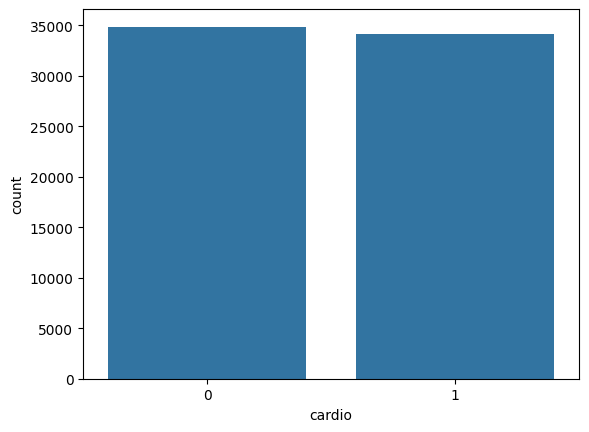

cardio
0    34853
1    34146
Name: count, dtype: int64

In [7]:
sns.countplot(data=df, x= 'cardio')
plt.show()
df['cardio'].value_counts()

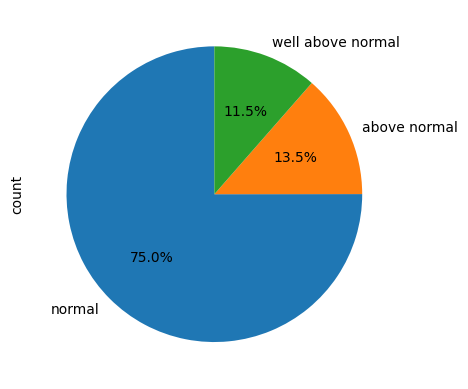

In [8]:
df['cholesterol'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,labels=["normal", "above normal", "well above normal"])
plt.show()

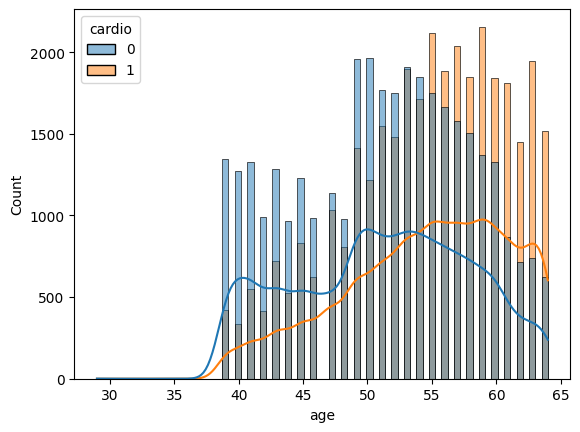

In [9]:

sns.histplot(data=df, x='age', hue='cardio', kde=True)
plt.show()


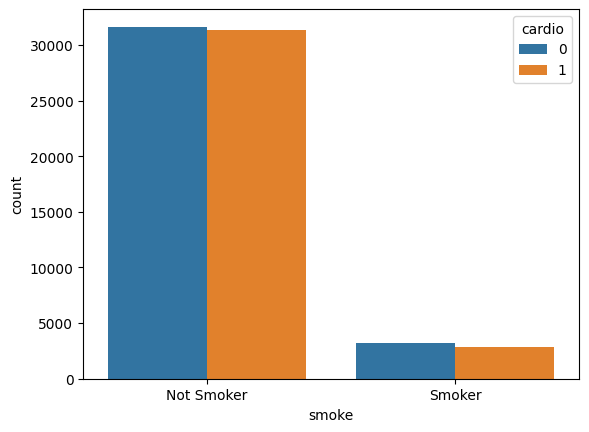

In [10]:

sns.countplot(data=df, x='smoke', hue='cardio')
plt.xticks([0,1], labels= ["Not Smoker", "Smoker"])
plt.show()

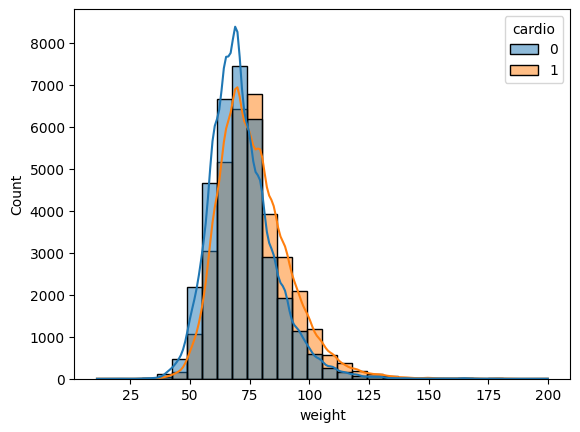

In [11]:
sns.histplot(df , x= 'weight', hue='cardio', bins= 30, kde=True)
plt.show()

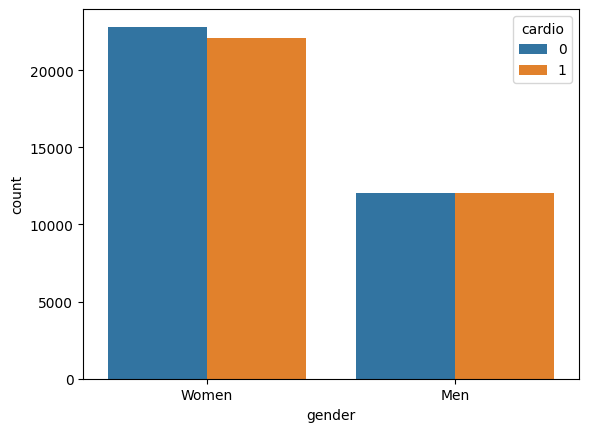

In [12]:
sns.countplot(data = df, x='gender', hue='cardio')
plt.xticks([0, 1], labels=['Women', 'Men'])
plt.show()

<Axes: xlabel='alco', ylabel='count'>

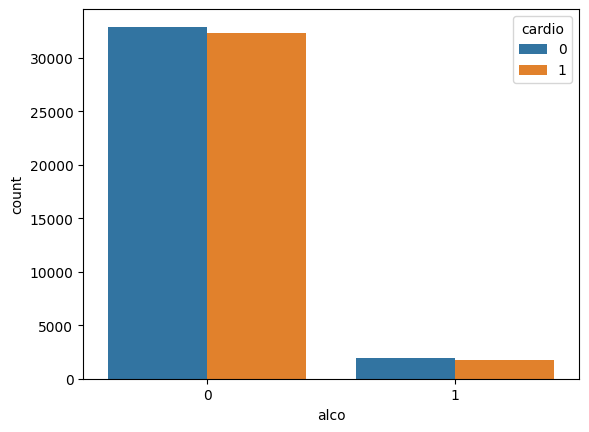

In [13]:
sns.countplot(data= df, x='alco', hue='cardio')

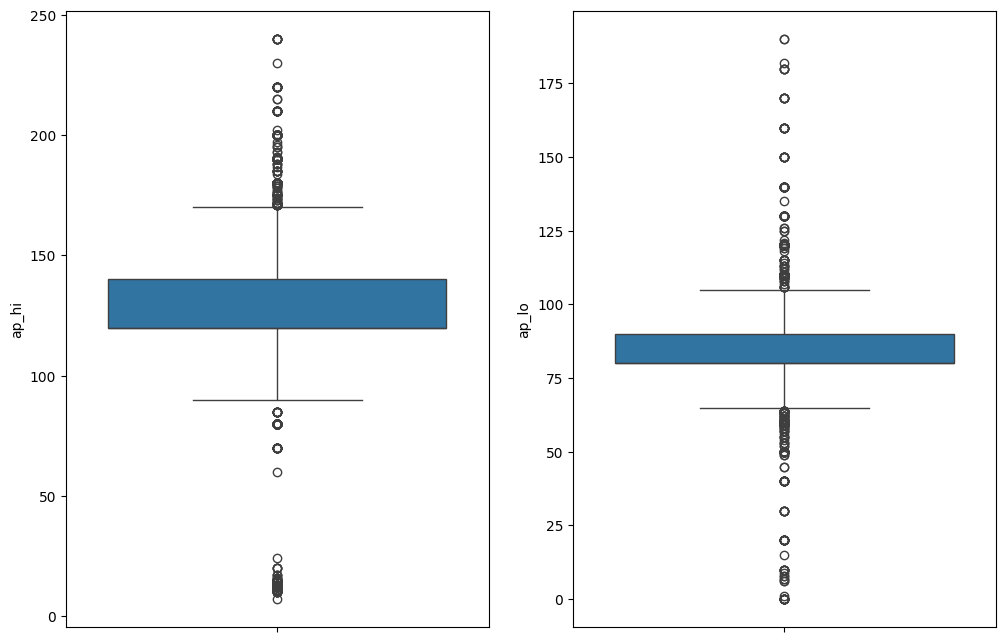

In [14]:
fig, ax= plt.subplots(1,2, figsize= (12,8))
sns.boxplot(data=df , y='ap_hi',ax=ax[0])
plt.subplot(1,2,2)
sns.boxplot(data = df, y= 'ap_lo', ax =ax[1])
plt.show()

## Andel sjukdomar

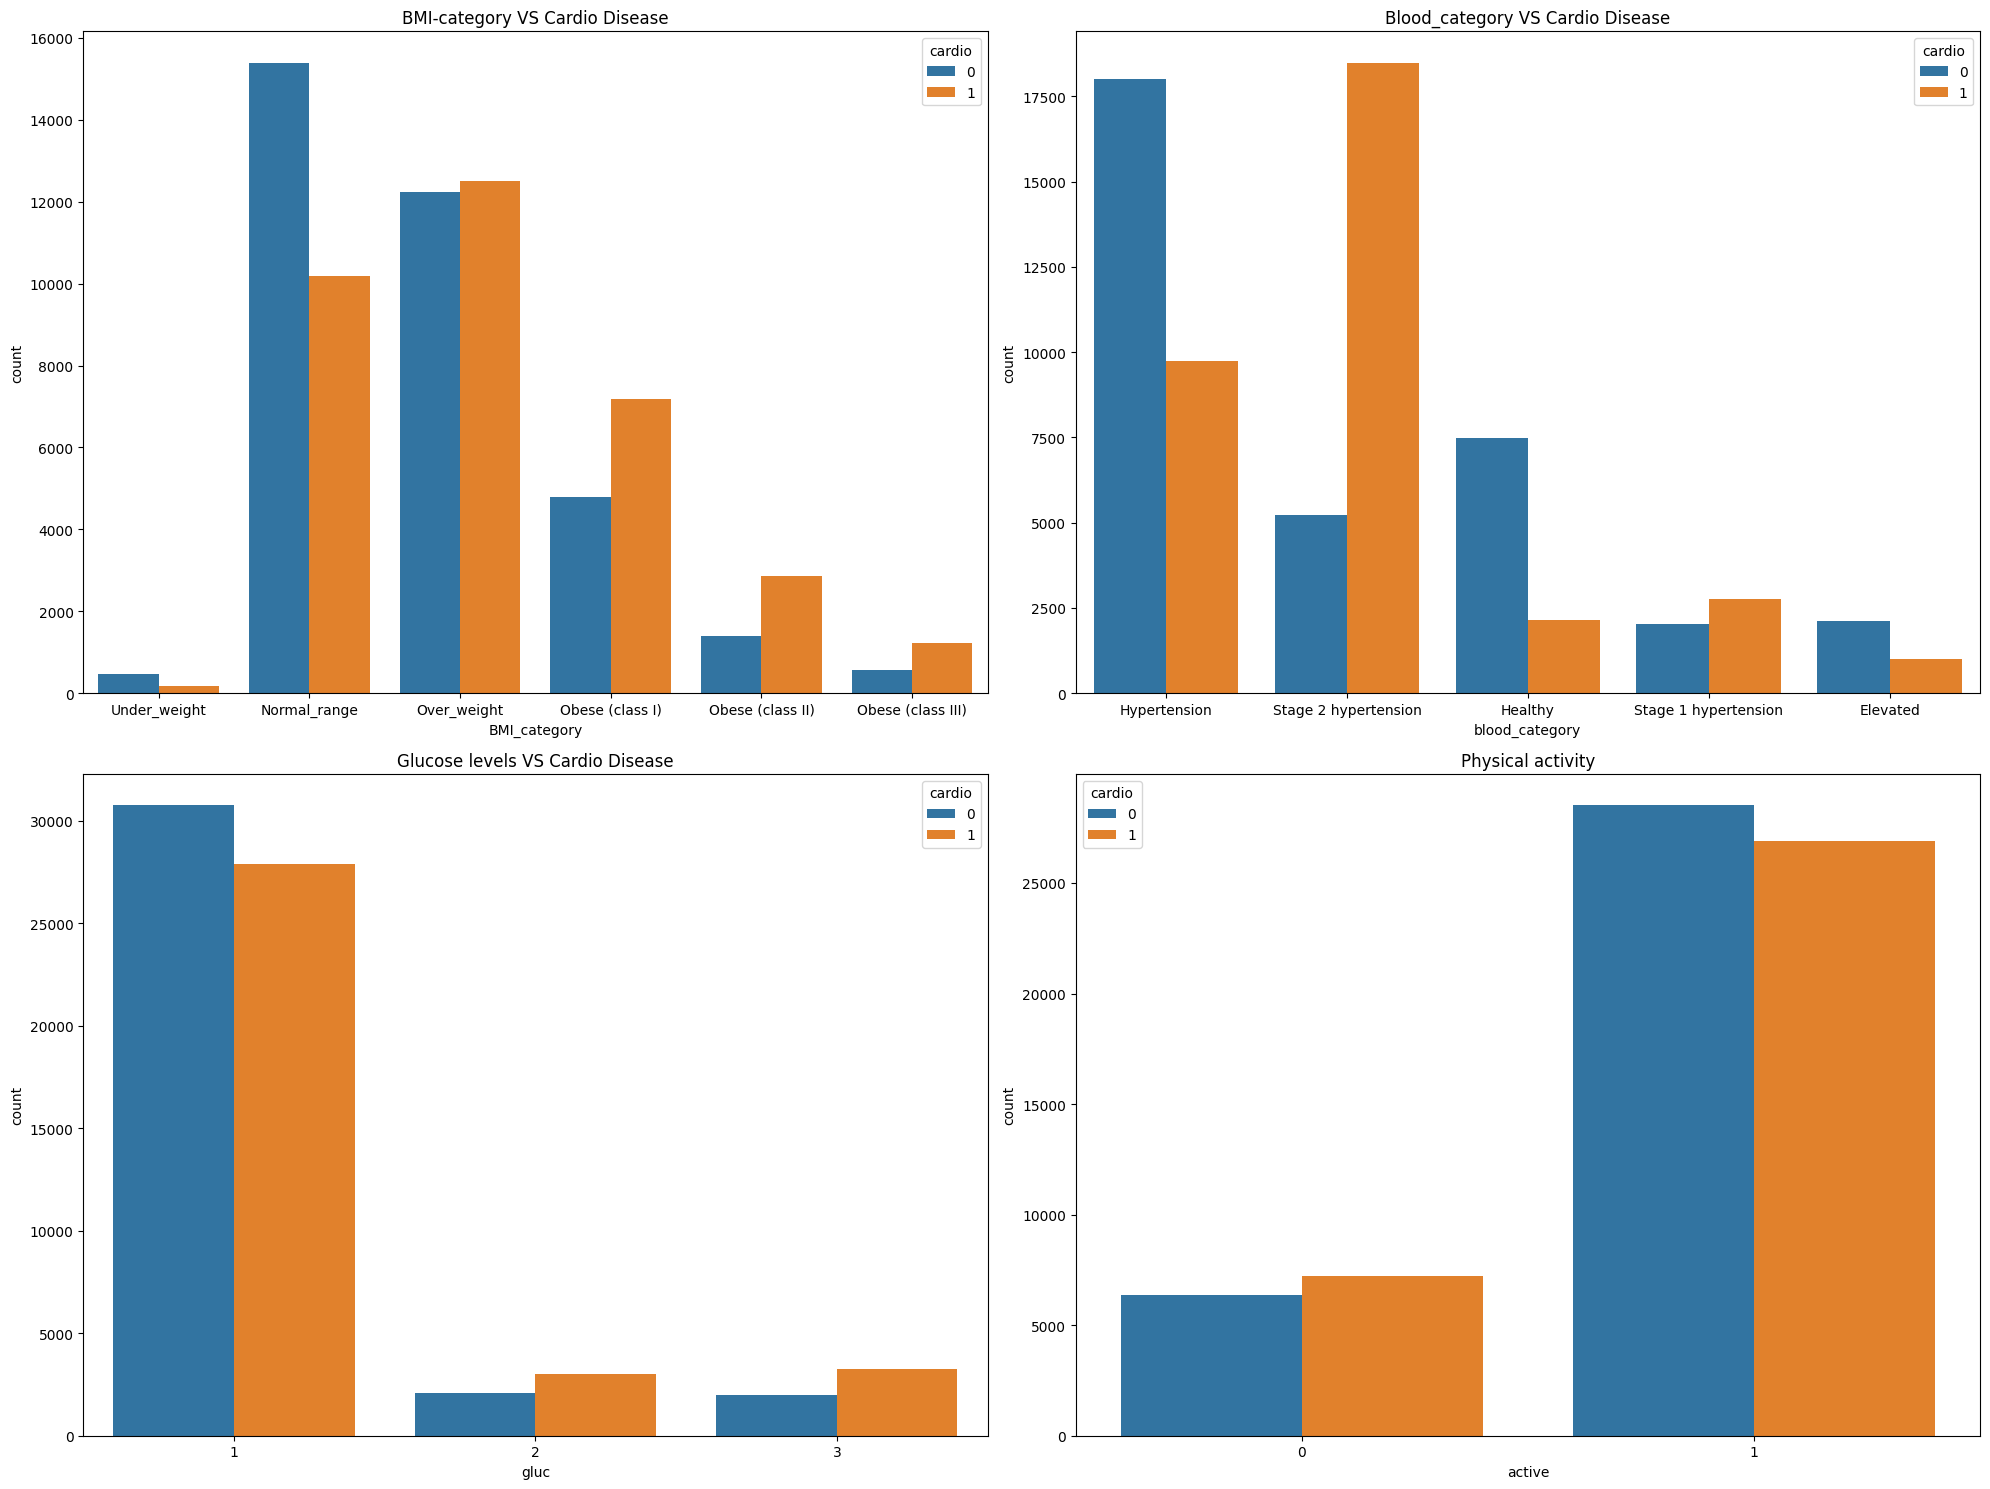

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(data=df, x='BMI_category', hue='cardio', order=['Under_weight','Normal_range','Over_weight','Obese (class I)','Obese (class II)','Obese (class III)'], ax=ax[0, 0])
ax[0, 0].set_title("BMI-category VS Cardio Disease")

sns.countplot(data=df, x='blood_category', hue='cardio', ax=ax[0, 1])
ax[0, 1].set_title("Blood_category VS Cardio Disease")

sns.countplot(data=df, x='gluc', hue='cardio', ax=ax[1, 0])
ax[1, 0].set_title("Glucose levels VS Cardio Disease")

sns.countplot(data=df, x='active', hue='cardio', ax=ax[1, 1])
ax[1, 1].set_title("Physical activity")


plt.tight_layout()
plt.show()

## Korrelation

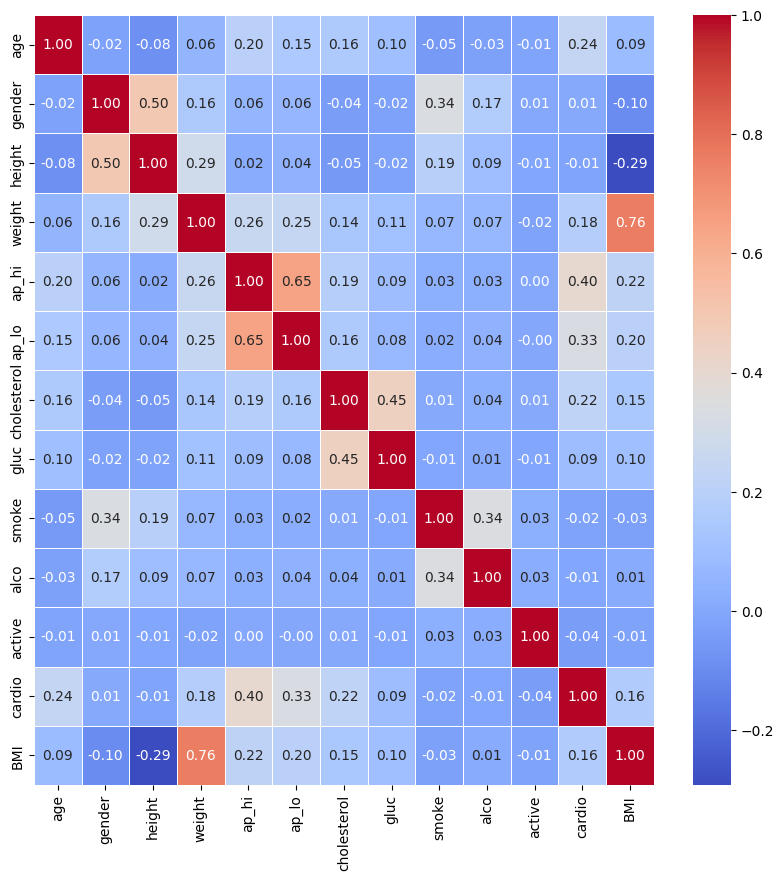

In [16]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

### I Korrelationsanalysen vi kan se att vissa variabler har starka samband medan andra har svag korrelation. Vikt och BMI har en stark korrelation(0.76), medan längden och BMI har svag relation eftersom korrelation (-0.29).

## Dataset

In [17]:
df1.shape

(68999, 20)

In [18]:
df2.shape

(68999, 12)

### ML modeller

In [19]:
df1_result = cardio.train_model(df1)



 Random Forest

 Accuracy: 0.7026570048309179

 Confusion Matrix':[[7694 2777]
 [3378 6851]]

 Classification Report':               precision    recall  f1-score   support

           0       0.69      0.73      0.71     10471
           1       0.71      0.67      0.69     10229

    accuracy                           0.70     20700
   macro avg       0.70      0.70      0.70     20700
weighted avg       0.70      0.70      0.70     20700


 KNN

 Accuracy: 0.6909178743961353

 Confusion Matrix':[[7348 3123]
 [3275 6954]]

 Classification Report':               precision    recall  f1-score   support

           0       0.69      0.70      0.70     10471
           1       0.69      0.68      0.68     10229

    accuracy                           0.69     20700
   macro avg       0.69      0.69      0.69     20700
weighted avg       0.69      0.69      0.69     20700


 Logistic Regression

 Accuracy: 0.722415458937198

 Confusion Matrix':[[8163 2308]
 [3438 6791]]

 Classification 

In [20]:
df2_result = cardio.train_model(df2)


 Random Forest

 Accuracy: 0.6868115942028985

 Confusion Matrix':[[7179 3292]
 [3191 7038]]

 Classification Report':               precision    recall  f1-score   support

           0       0.69      0.69      0.69     10471
           1       0.68      0.69      0.68     10229

    accuracy                           0.69     20700
   macro avg       0.69      0.69      0.69     20700
weighted avg       0.69      0.69      0.69     20700


 KNN

 Accuracy: 0.6960386473429951

 Confusion Matrix':[[7439 3032]
 [3260 6969]]

 Classification Report':               precision    recall  f1-score   support

           0       0.70      0.71      0.70     10471
           1       0.70      0.68      0.69     10229

    accuracy                           0.70     20700
   macro avg       0.70      0.70      0.70     20700
weighted avg       0.70      0.70      0.70     20700


 Logistic Regression

 Accuracy: 0.7257971014492753

 Confusion Matrix':[[8161 2310]
 [3366 6863]]

 Classification

In [21]:
best_models_df1 = cardio.tune_models(df1)



 Tuning Random Forest
Best parameterea for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
 Tuning KNN
Best parameterea for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}
 Tuning Logistic Regression
Best parameterea for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
 Tuning SVM
Best parameterea for SVC: {'C': 0.1, 'kernel': 'linear'}


In [22]:
best_models_df2 = cardio.tune_models(df2)

 Tuning Random Forest
Best parameterea for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
 Tuning KNN
Best parameterea for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}
 Tuning Logistic Regression
Best parameterea for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
 Tuning SVM
Best parameterea for SVC: {'C': 1, 'kernel': 'linear'}
